Q1 (20 Points). Generate two random numbers, n1, and n2 between 6 and 10. Construct an identity matrix my_eye, of size n1 by n2 (do not hard code). Then, construct a tensor of zeros, my_zeros of size of the same size as my_eye (do not specify n1 or n2 when you create my_zeros).

In [29]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [4]:
np.random.seed(2024) # may i set a seed?
n1, n2 = np.random.randint(6, 11, size = 2)
my_eye = np.eye(n1, n2)
my_zeros = torch.Tensor(np.zeros(my_eye.shape))


Q2 (10 Points). Write a function that uses slicing assignment operations to modify the first 6 rows and first 8 columns of the tensor my zeros so they are equal to

$$
\begin{bmatrix}
0 & 1 & 1 & 2 & 2 & 2 & 2 & 2\\
0 & 1 & 1 & 2 & 2 & 2 & 2 & 2\\
3 & 4 & 3 & 4 & 5 & 5 & 6 & 8\\
3 & 4 & 3 & 4 & 5 & 5 & 6 & 8\\
3 & 4 & 3 & 4 & 5 & 5 & 6 & 8\\
3 & 4 & 3 & 4 & 5 & 5 & 6 & 8\\
\end{bmatrix}
$$

In [10]:
row_1 = torch.Tensor([0, 1, 1] + [2] * 5)
row_2 = torch.Tensor([3, 4]*2 + [5, 5, 6, 8])
my_zeros[:2, :8] = row_1
my_zeros[2:6, :8] = row_2
my_zeros

tensor([[0., 1., 1., 2., 2., 2., 2., 2.],
        [0., 1., 1., 2., 2., 2., 2., 2.],
        [3., 4., 3., 4., 5., 5., 6., 8.],
        [3., 4., 3., 4., 5., 5., 6., 8.],
        [3., 4., 3., 4., 5., 5., 6., 8.],
        [3., 4., 3., 4., 5., 5., 6., 8.]])

Q3 (20+10 Points). $softplus(𝑥) = \alpha x + (1- \alpha) Log(1 +e^x)$ represents a family of smooth functions that can replace ReLu. Use your last two digits of UM ID divided by 100 as $\alpha$ (for example if the last two digits are 95, choose 0.95).
Evaluate the gradient of this function at x = -0.1 , x = 0.0, and x= 0.1 using Pytorch autograd functionality and verify them by its closed form. You get bonus points if you plot a few of these along with ReLU

In [26]:
alpha = .08
x = torch.tensor([-.1, 0., .1], requires_grad = True)
softplux = lambda x: alpha*x + (1-alpha)*torch.log1p(torch.exp(x))
y = softplux(x)
ext_grad = torch.tensor([1., 1., 1.])
y.backward(gradient = ext_grad)
grad_func = lambda x: alpha + (1-alpha) * torch.exp(x) / (1 + torch.exp(x))
x_grad_closed = grad_func(x)
print(x.grad, x_grad_closed)


tensor([0.5170, 0.5400, 0.5630]) tensor([0.5170, 0.5400, 0.5630], grad_fn=<AddBackward0>)


In [28]:
x_cp = torch.tensor([-.1, 0., .1], requires_grad = True)
y_relu = torch.nn.functional.relu(x_cp)
y_relu.backward(gradient = ext_grad)
x_cp.grad

tensor([0., 0., 1.])

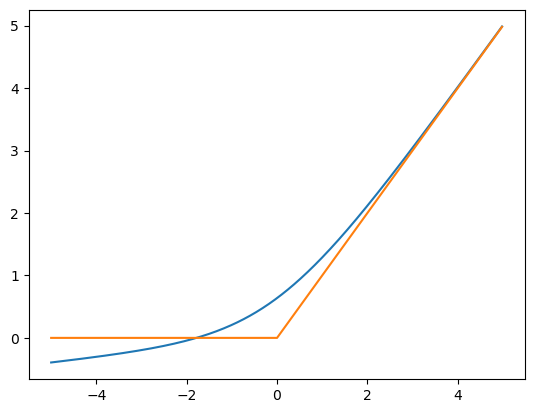

In [34]:
ax = torch.tensor(np.arange(-5, 5, .02))
plt.plot(ax, softplux(ax))
plt.plot(ax, torch.nn.functional.relu(ax))

Q4-1 (5 Points). In terms of computational efficiency, what is achieved during backpropagation modular implementation? 


Computing the gradients is more efficient than computing derivatives for each individual weights.

Q4-2 (5 Points) What are the advantages of the stochastic and batch gradient descent methods (one of each)? 

SGD: Faster convergence
Batch GD: Vectorization and thus faster training

Q5. (10 Points) Number of parameters required to model a feedforward neural network which takes 30 $\times$ 30 gray scale image data as input, has three hidden layers with four hidden units each, and learns a five class in the output layer, are: 

In [20]:
num_params = 900 * 5 + 5**2 * 3 + 5*5
num_params

4600

Q6 (10+10 Points). a) What happens if we remove all non-linearities between the layers of neural networks in above question? <br>
b) What is the best strategy for initializing a neural network weights?
(Bonus) What can go wrong if we initialize all weights to be equal at the beginning of training?

### (a)
It reduces to a multivariate linear regression model, regardless of the numbers of layers and units.
### (b)
Using normal distribution with $\mu = 0$ and $\sigma = \frac{1}{\sqrt{\text{num\_units}}}$; If we initialize all weights to be equal at the beginning, the forward pass and backward propagation algorithms will treat all units as the same, and they will end up with the same weights. You don't want any of this.

Q7 (20 Point). Create a dataset class "set_xx" as a subclass of abstract class Dataset from torch.utils.data where xx are the last two digits of your UM ID. Your class creates an object by accepting an integer, n as the length that by default is 20. This object has two attributes X and y. X and y are tensors of n $\times$ 3 and n $\times$ 2 of ones. Create an instance of this class with a name and size of your choice. 

In [24]:
class set_xx(torch.utils.data.Dataset):
    def __init__(self, n = 20):
        self.X = torch.tensor(np.ones([n, 3]))
        self.y = torch.tensor(np.ones([n, 2]))

my_obj = set_xx(n = 100)